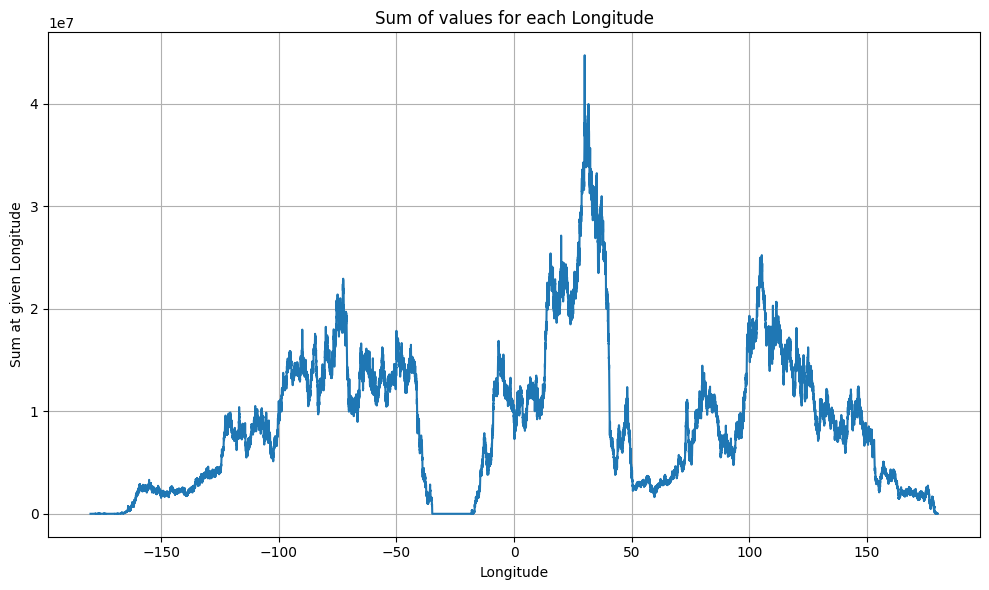

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 1. 使用 rasterio 库读取 tif 文件。
with rasterio.open('H:\\Global_tree_cover\\001\\Global\\2000Edge.tif') as dataset:
    # 读取 tif 数据
    data = dataset.read(1)
    
    # 获取经度信息
    transform = dataset.transform
    longitudes = [transform * (x, 0) for x in range(data.shape[1])]
    longitudes = [coord[0] for coord in longitudes]

# 2. 使用 numpy 计算每一个经度上的统计总和，忽略 NaN 值。
data = np.where((data < -1000000) | (data > 1000000), np.nan, data)
sums = np.nansum(data, axis=0)

# 3. 使用 matplotlib 绘制结果。
plt.figure(figsize=(10, 6))
plt.plot(longitudes, sums)
plt.xlabel('Longitude')
plt.ylabel('Sum at given Longitude')
plt.title('Sum of values for each Longitude')
plt.grid(True)
plt.tight_layout()
plt.show()

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 1. 使用 rasterio 库读取 tif 文件。
with rasterio.open('H:\\Global_tree_cover\\001\\Global\\2020Edge.tif') as dataset:
    # 读取 tif 数据
    data = dataset.read(1)
    
    # 获取经度信息
    transform = dataset.transform
    longitudes = [transform * (x, 0) for x in range(data.shape[1])]
    longitudes = [coord[0] for coord in longitudes]

# 2. 使用 numpy 计算每一个经度上的统计总和，忽略 NaN 值。
data = np.where((data < -1000000) | (data > 1000000), np.nan, data)
sums = np.nansum(data, axis=0)

# 3. 使用 matplotlib 绘制结果。
plt.figure(figsize=(10, 6))
plt.plot(longitudes, sums)
plt.xlabel('Longitude')
plt.ylabel('Sum at given Longitude')
plt.title('Sum of values for each Longitude')
plt.grid(True)
plt.tight_layout()
plt.show()

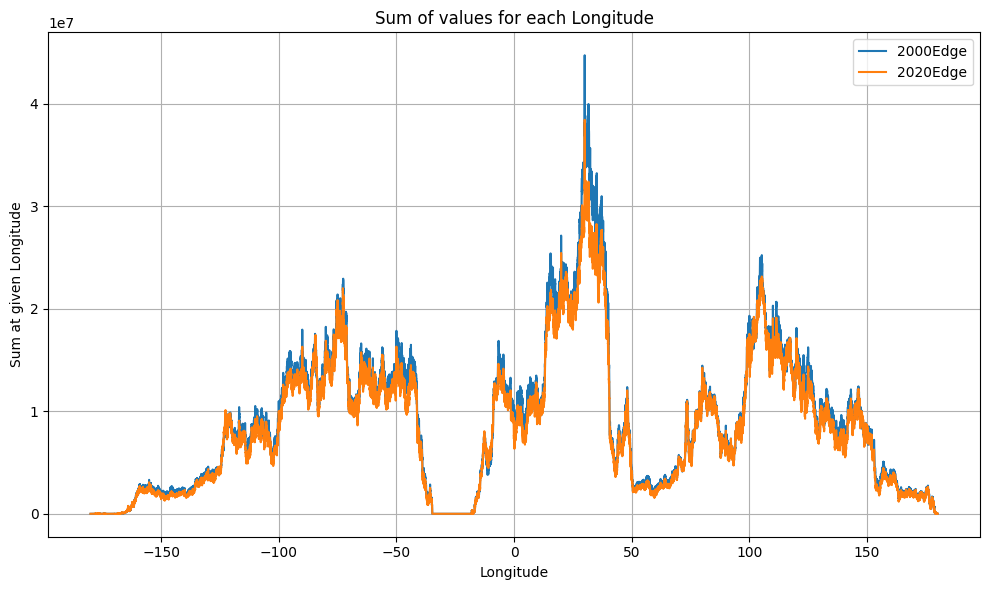

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def process_data(filepath):
    with rasterio.open(filepath) as dataset:
        data = dataset.read(1)
        transform = dataset.transform
        longitudes = [transform * (x, 0) for x in range(data.shape[1])]
        longitudes = [coord[0] for coord in longitudes]
        data = np.where((data < -1000000) | (data > 1000000), np.nan, data)
        sums = np.nansum(data, axis=0)
    return longitudes, sums

longitudes1, sums1 = process_data('H:\\Global_tree_cover\\001\\Global\\2000Edge.tif')
longitudes2, sums2 = process_data('H:\\Global_tree_cover\\001\\Global\\2020Edge.tif')

plt.figure(figsize=(10, 6))
plt.plot(longitudes1, sums1, label='Edge 2000')
plt.plot(longitudes2, sums2, label='Edge 2020')
plt.xlabel('Longitude')
plt.ylabel('Sum at given Longitude')
plt.title('Sum of values for each Longitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

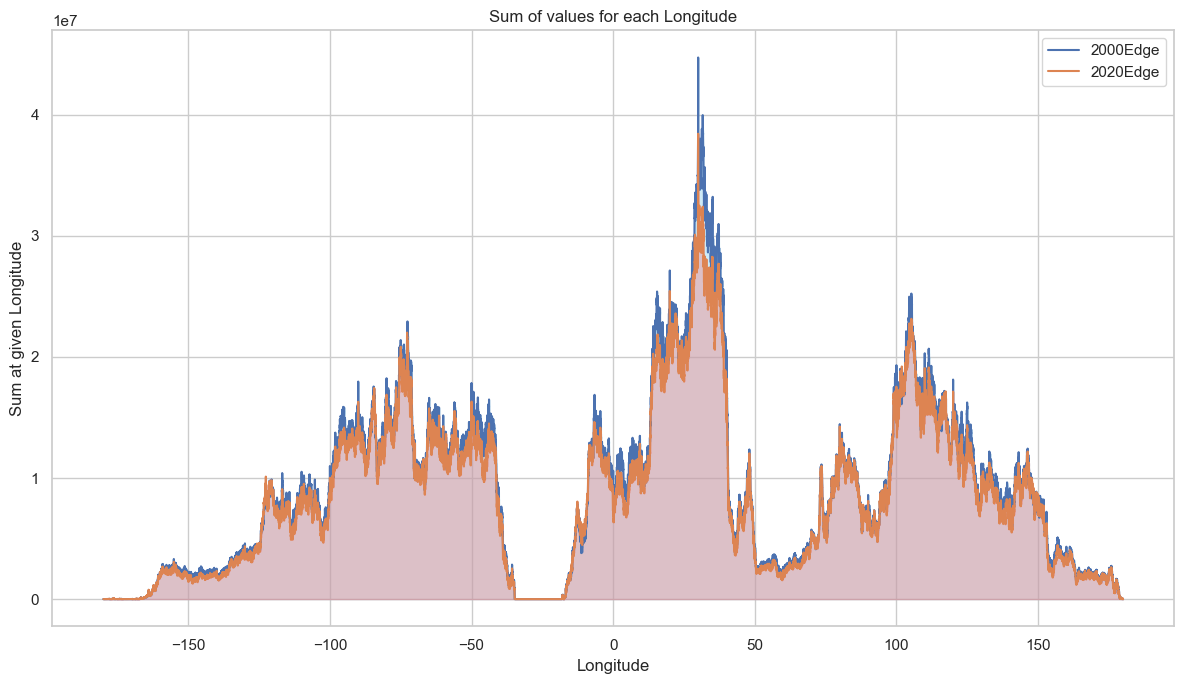

In [13]:
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
plt.plot(longitudes1, sums1, label='2000Edge')
plt.plot(longitudes2, sums2, label='2020Edge')
plt.fill_between(longitudes1, sums1, color='skyblue', alpha=0.4)
plt.fill_between(longitudes2, sums2, color='lightcoral', alpha=0.4)
plt.xlabel('Longitude')
plt.ylabel('Sum at given Longitude')
plt.title('Sum of values for each Longitude')
plt.legend()
plt.tight_layout()
plt.show()

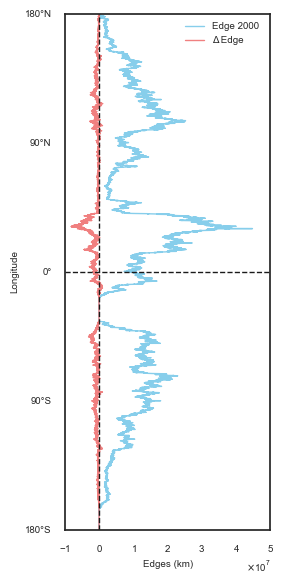

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
sns.set_style("white")

# 计算 2020 和 2000 的差异
diff_sums = np.array(sums2) - np.array(sums1)

plt.figure(figsize=(3, 6),dpi=100)

# 绘制 2000 的数据
plt.plot(sums1, longitudes1, label='Edge 2000 ', color='skyblue',linewidth = 1)

# 绘制 2020 和 2000 的差异
plt.plot(diff_sums, longitudes2, label='Δ Edge', color='lightcoral',linewidth = 1)

plt.xlim(-10000000, 50000000)  # 设置 x 轴的范围
plt.ylim(-180, 180)  # 设置 x 轴的范围
# 自定义 y 轴的刻度标签
y_ticks = range(-180, 181, 90)  # 例如，每90度一个刻度
y_labels = [f'{abs(tick)}°{"N" if tick > 0 else "S" if tick < 0 else ""}' for tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)

plt.axvline(x=0, color='k', linestyle='--',linewidth = 1)  # 添加垂直线
plt.axhline(y=0, color='k', linestyle='--',linewidth = 1)  # 添加水平线

plt.ylabel('Longitude', fontsize=7)
plt.xlabel('Edges (km)', fontsize=7)

# 设置 x 轴刻度的字体大小

# 设置 x 轴标签为科学计数法，并且格式为 10^
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
plt.gca().xaxis.set_major_formatter(formatter)
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)

# 这里的关键是首先绘制图形，然后获取和修改偏移值的字体大小
plt.gcf().canvas.draw()

# 获取偏移值的文本对象并设置其字体大小
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(7)
# plt.title('Sum of values for each Longitude')
plt.legend(loc='upper right', fontsize=7, frameon=False)
plt.tight_layout()
plt.show()

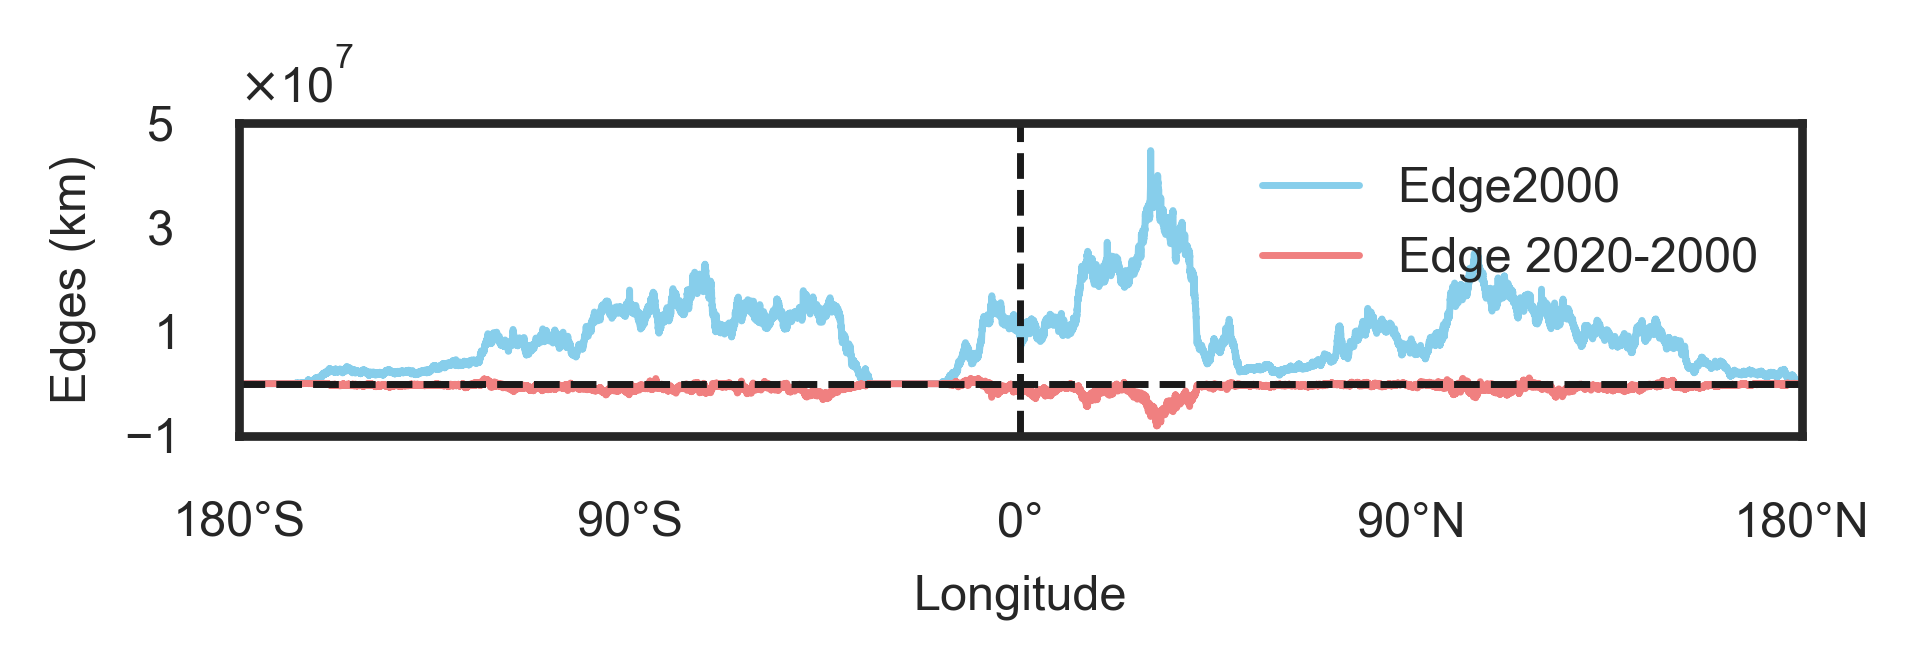

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

sns.set_style("whitegrid")
sns.set_style("white")

plt.figure(figsize=(4, 1.5), dpi=500)

# 绘制 2000 的数据
plt.plot(longitudes1, sums1, label='Edge2000 ', color='skyblue', linewidth=1)

# 绘制 2020 和 2000 的差异
plt.plot(longitudes2, sums2-sums1, label='Edge 2020-2000', color='lightcoral', linewidth=1)

plt.xlim(-180, 180)  # 设置 x 轴的范围
plt.ylim(-10000000, 50000000)  # 设置 y 轴的范围

# 自定义 y 轴的刻度标签
x_ticks = range(-180, 181, 90)
x_labels = [f'{abs(tick)}°{"N" if tick > 0 else "S" if tick < 0 else ""}' for tick in x_ticks]
plt.xticks(x_ticks, x_labels)

y_ticks = range(-10000000, 50000001, 20000000)
plt.yticks(y_ticks)

plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)

plt.xlabel('Longitude', fontsize=7)
plt.ylabel('Edges (km)', fontsize=7)

# 设置 y 轴标签为科学计数法，并且格式为 10^
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gcf().canvas.draw()

# 获取偏移值的文本对象并设置其字体大小
offset_text = plt.gca().yaxis.get_offset_text()
offset_text.set_size(7)

plt.axhline(y=0, color='k', linestyle='--', linewidth=1)  # 添加水平线
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)  # 添加垂直线

plt.legend(loc='upper right', fontsize=7, frameon=False)
plt.tight_layout()
plt.show()

In [99]:
x_labels

['180°S', '90°S', '0°', '90°N', '180°N']